---

# Vadi-Samvadi Based Classification

---

### Pitch Histogram
- Serves as an indicator of **vadi**, **samvadi**, and **vivadi** swaras.
- Also indicates whether a particular **svara** is **tivra**, **shuddha**, or **komal**.


In [2]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [3]:
X = np.load('../dataset/counts.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [4]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73)
y shape: (36262, 40)


## Train-test split

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [5]:
static_input = keras.layers.Input(shape=(X.shape[1],))

In [6]:
x = keras.layers.Dense(512, activation='relu')(static_input)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(static_input, outputs=output)

I0000 00:00:1744364143.223596   32909 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        37,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,416 (2.07 MB)

 Trainable params: 541,416 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744364179.446897   33067 service.cc:152] XLA service 0x7fc4f400e5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744364179.446982   33067 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-11 11:36:19.510491: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744364179.765255   33067 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-11 11:36:20.717007: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_299_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-11 11:36:20.916758: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusi

 57/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0512 - loss: 3.6654

I0000 00:00:1744364184.995330   33067 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


779/794 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1781 - loss: 2.9386

2025-04-11 11:36:28.169009: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_299', 64 bytes spill stores, 64 bytes spill loads

2025-04-11 11:36:29.323674: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1003', 8 bytes spill stores, 8 bytes spill loads



794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1799 - loss: 2.9295

2025-04-11 11:36:32.372547: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76', 484 bytes spill stores, 484 bytes spill loads

2025-04-11 11:36:32.804077: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-11 11:36:33.592478: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76_0', 36 bytes spill stores, 36 bytes spill loads

2025-04-11 11:36:33.750788: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_69', 488 bytes spill stores, 488 bytes spill loads

2025-04-11 11:36:33.811784: I external/l

794/794 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1800 - loss: 2.9289 - val_accuracy: 0.3918 - val_loss: 1.9594
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4463 - loss: 1.7696 - val_accuracy: 0.4979 - val_loss: 1.5821
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5427 - loss: 1.4539 - val_accuracy: 0.5641 - val_loss: 1.3901
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5829 - loss: 1.3034 - val_accuracy: 0.5946 - val_loss: 1.2800
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6154 - loss: 1.1960 - val_accuracy: 0.6192 - val_loss: 1.2033
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6442 - loss: 1.0945 - val_accuracy: 0.6488 - val_loss: 1.1509
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6659 - loss: 1.0403 - val_accuracy: 0.6343 - val_loss: 1.1936
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6860 - loss: 0.9819 - val_accuracy: 0.6479 - va

In [9]:
# Save the model
model.save('../models/vadi_samvadi_model.keras')

## Test

In [6]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/vadi_samvadi_model.keras')

I0000 00:00:1744370774.726219    1145 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [8]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 1.2143


In [9]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 74.08


In [10]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.7263385074825683


In [12]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

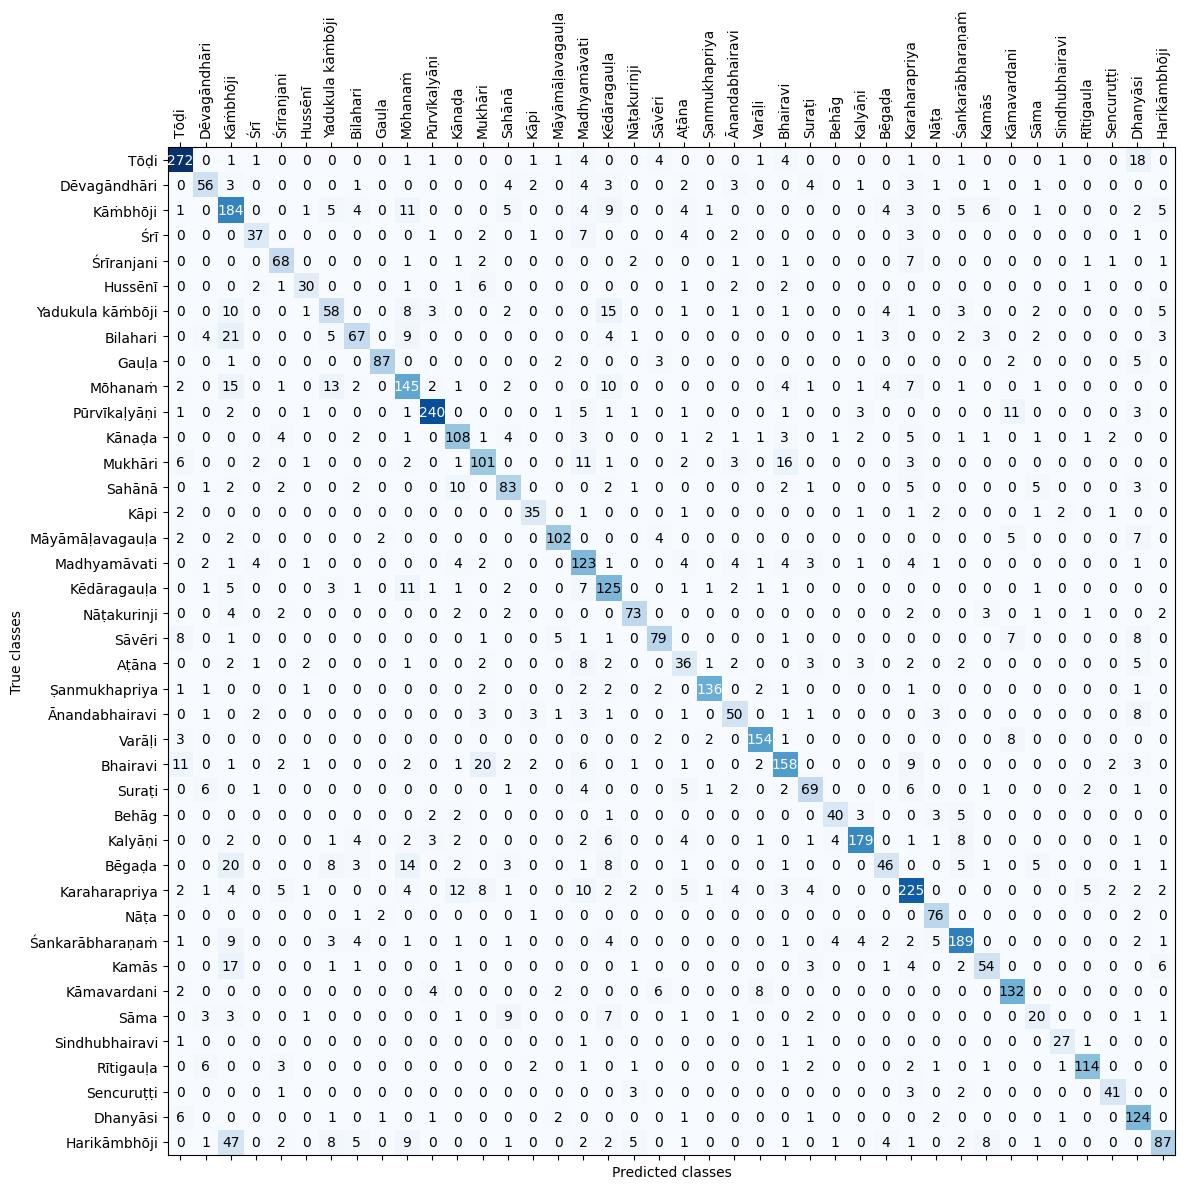

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_histogram.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

            Tōḍi       0.85      0.87      0.86       312
    Dēvagāndhāri       0.67      0.63      0.65        89
        Kāṁbhōji       0.52      0.72      0.60       255
             Śrī       0.74      0.64      0.69        58
      Śrīranjani       0.75      0.79      0.77        86
         Hussēnī       0.73      0.64      0.68        47
Yadukula kāṁbōji       0.55      0.50      0.52       115
        Bilahari       0.69      0.54      0.60       125
           Gauḷa       0.95      0.87      0.91       100
         Mōhanaṁ       0.65      0.68      0.67       212
    Pūrvīkaḷyāṇi       0.93      0.88      0.91       272
          Kānaḍa       0.72      0.74      0.73       145
         Mukhāri       0.67      0.68      0.68       149
          Sahānā       0.68      0.70      0.69       119
            Kāpi       0.74      0.74      0.74        47
 Māyāmāḷavagauḷa       0.88   

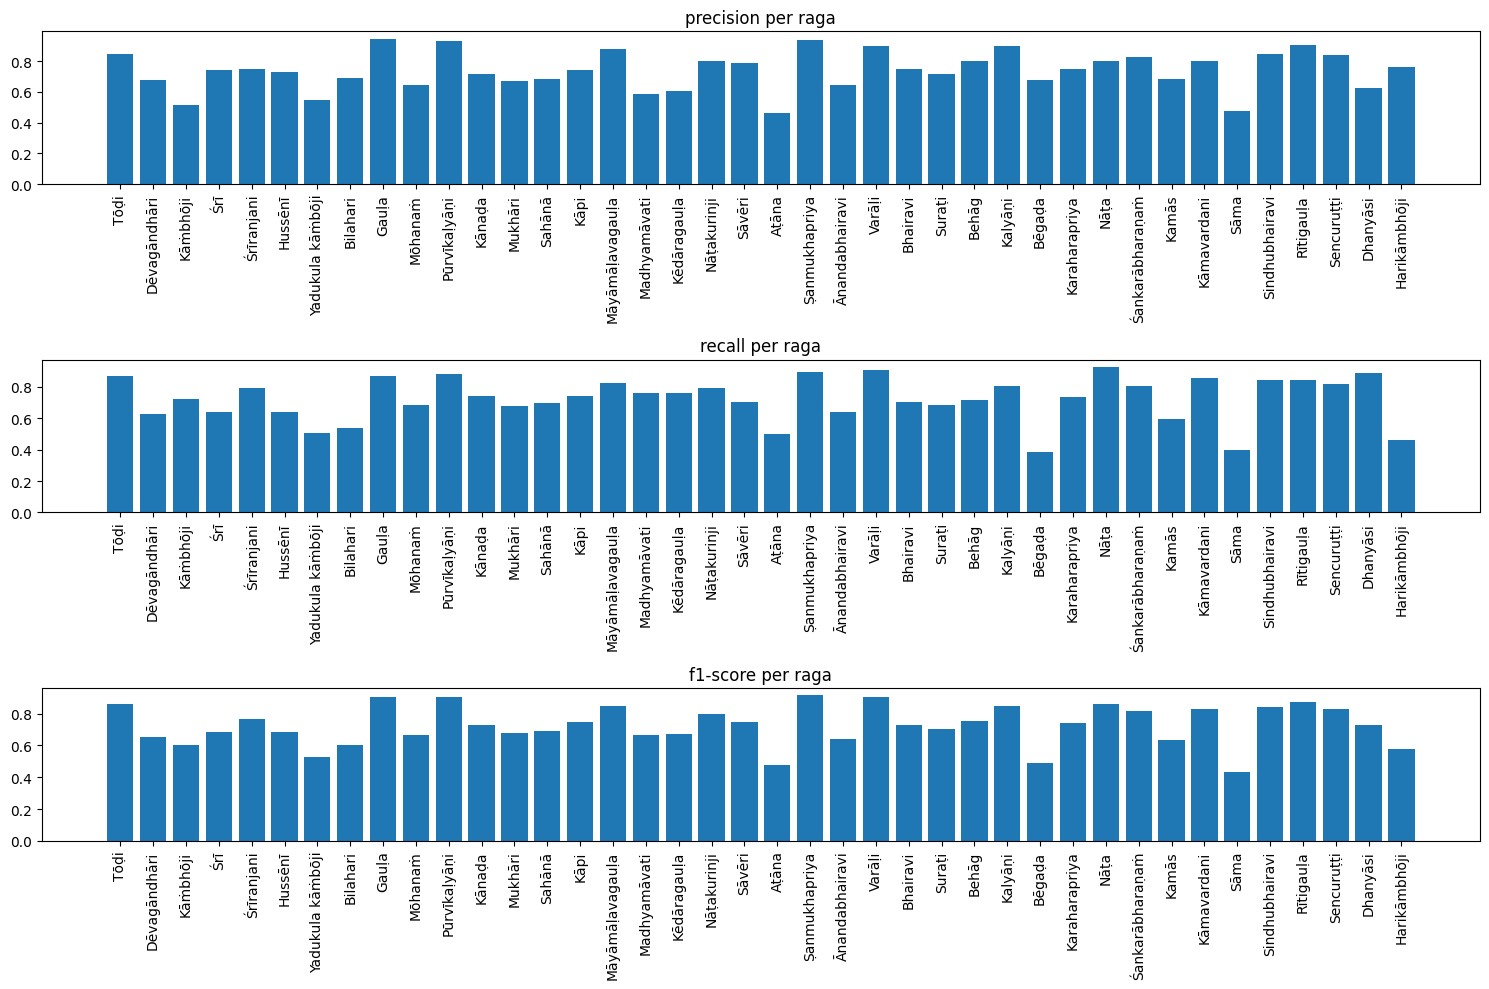

In [16]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)  # Fixed: model only takes one input
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class_vadi_samvadi.png', dpi=300)  # Changed filename to avoid overwriting
plt.show()